Answer 1

In [1]:
import pandas as pd
insta = pd.read_csv(f"instagram_reach.csv")

In [2]:
insta.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [3]:
insta.isna().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [4]:
insta.shape

(100, 8)

In [16]:
insta.dropna(subset=['Caption'], inplace=True)

In [17]:
insta.isna().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [19]:
insta.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [21]:
insta.drop(['Unnamed: 0','S.No'], axis=1)

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [24]:
import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\singh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of impressions by followers'}, xlabel='Followers', ylabel='Density'>

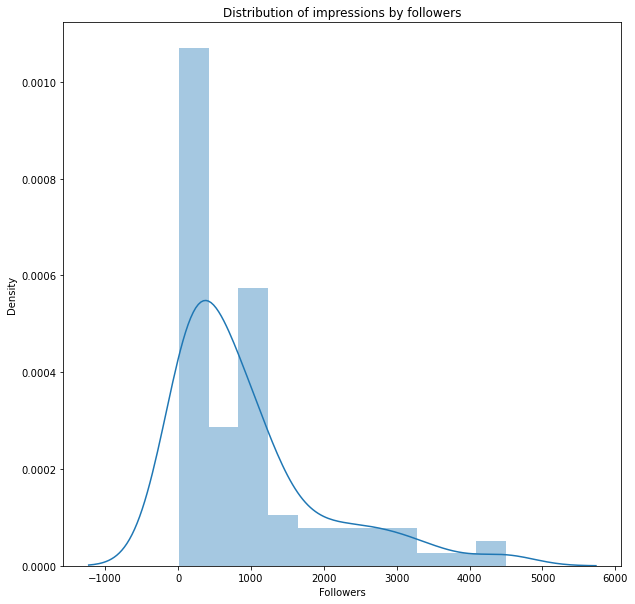

In [26]:
#Distribution of impressions from followers
plt.figure(figsize=(10,10))
plt.title("Distribution of impressions by followers")
sb.distplot(insta['Followers'])

C:\Users\singh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Likes', ylabel='Density'>

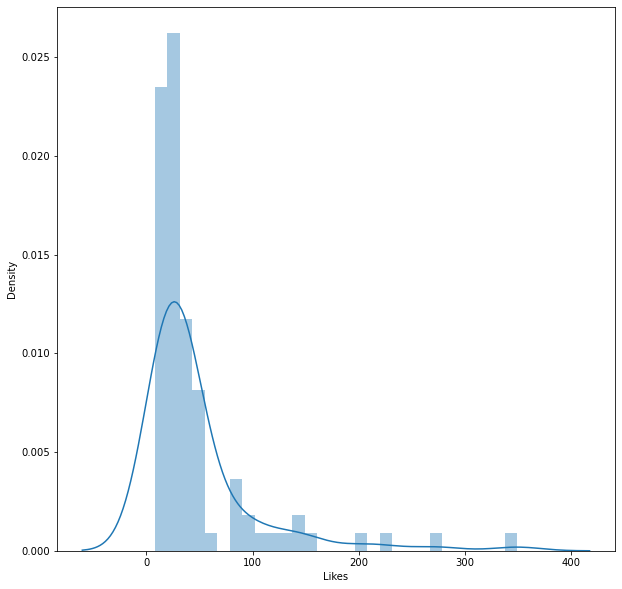

In [28]:
#checking same with likes
plt.figure(figsize=(10,10))
sb.distplot(insta['Likes'])

In [57]:
## Plotting Scatter-plot for showing Relationship Between Likes and Followers 
import plotly.express as px

figure = px.scatter(data_frame = insta, x="Likes",
                    y="Followers", trendline="ols", 
                    title = "Relationship Between Likes and Followers")
figure.show()

In [58]:
# Selecting relevent input features
features = ['USERNAME', 'Caption', 'Hashtags', 'Followers']
output_likes = 'Likes'
output_time_since_posted = 'Time since posted'

In [61]:
# splitting the data in test and train
from sklearn.model_selection import train_test_split
x = insta[features]
y_likes = insta[output_likes]
y_time_since_posted = insta[output_time_since_posted]
x_train , x_test , y_likes_train , y_likes_test , y_time_since_posted_train , y_time_since_posted_test = train_test_split(x,y_likes,y_time_since_posted,test_size=0.2,random_state=42)

In [66]:
#using one hot encoding for text features
encoder = OneHotEncoder(sparse=False , handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

Model training

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder


In [68]:
#predicting no. of likes
likes_model = LinearRegression()
likes_model.fit(x_train_encoded,y_likes_train)

LinearRegression()

In [69]:
likes_predictions = likes_model.predict(x_test_encoded)

In [71]:
likes_mse = mean_squared_error(y_likes_test,likes_predictions)
likes_mse

1813.5856249264884

In [73]:
# Preprocess the time since posted variable
def extract_numerical_value(time_string):
    numerical_value = re.findall(r'\d+', time_string)[0]
    return int(numerical_value)

In [74]:
y_time_since_posted_train = y_time_since_posted_train.apply(extract_numerical_value)
y_time_since_posted_test = y_time_since_posted_test.apply(extract_numerical_value)

In [75]:
#predicting time since posted
time_model = LinearRegression()
time_model.fit(x_train_encoded,y_time_since_posted_train)
time_prediction = time_model.predict(x_test_encoded)
time_mse = mean_squared_error(y_time_since_posted_test,time_prediction)
time_mse

13.230105922849827